>## <b> Practice Project week 1: 2. Salary Project </b>
<b><em> By: Ms. Yashshree bawiskar </em></b>

<b><em> Batch: 1838 </em></b>

#### **Problem Statement:**
**Predict the salary if the employee using the features provided in the data.**


Downlaod Files:
https://github.com/dsrscientist/dataset3/blob/main/Salaries.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset CSV file using pandas
df = pd.read_csv('Salaries.csv')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
df.head()  # Showing Top 5 Rows

No. of Rows : 397
No. of Columns : 6


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
# Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['yrs.since.phd', 'yrs.service', 'salary'], object: ['rank', 'discipline', 'sex']}

In [5]:
# Spliting data into numerical & categorical data
Numerical = ['yrs.since.phd', 'yrs.service', 'salary']
Categorical = ['rank', 'discipline', 'sex']

#### Observation :-
- **Dataset consist of 397 rows and 6 columns.**
- **We can that some of features come with object datatypes while others are as int datatypes.**
- **rank is ordinal features while sex is nominal feature with object datatypes.**

***In this data set Our objective is to predict salary of employees, so here `Salary is our Target variable` for which we are gone build Machine Learning model in this project.***

### Data Integrity Check

> **As Data set is large it may contain some `discrepancies or data error` like <u> Missing values, duplicated entries or presense of any whitespaces, '?', 'NA', '-' in dataset </u>.**
___
***Keeping above fact in mind we will perform data integrity check before further moving forward.***

In [6]:
df.duplicated().sum() # This will check the duplicate data for all columns.

4

#### Comment :
- **There 4 row with completely duplicate values of all features.**

> **<u>Training model on duplicate data will inflate accuracy model and additional it will increase computational resources consumption and computational time</u>.**

- ***So we will drop duplicate entries before going further.***

In [7]:
# Droping duplicate entries
df.drop_duplicates(keep ='last', inplace = True) # (Keep='last') will drop first duplicate entry 
                                                 # & keep last duplicate entry

In [8]:
df.shape

(393, 6)

### **Check for presense of any whitespaces, '?', 'NA', '-' in dataset**

In [9]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

**No White space, 'NA', '-' exist in dataset.**

### **Missing Value Check**

In [10]:
df.isnull().sum().any()

False

**No Missing value present in dataset.**

**Yes To Go Further !!!**

### **Statistical Matrix**

In [11]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
yrs.since.phd,393.000000,22.503817,12.814637,1.000000,12.000000,21.000000,32.000000,56.000000
yrs.service,393.000000,17.755725,12.996129,0.000000,7.000000,17.000000,27.000000,60.000000
salary,393.000000,113930.844784,30360.608788,57800.000000,91000.000000,107500.000000,134550.000000,231545.000000


In [12]:
df.describe(include=object)

,rank,discipline,sex
count,393,393,393
unique,3,2,2
top,Prof,B,Male
freq,266,212,354


#### **Observataion:**
- **In all numerical columns mean is greater than median, which means data is skewed.**
- **By looking at 75% and max columns we can see that outliers exist in dataset.**
- **Minimum service years from joining is zero while maximum service year is 56 year.**
- **rank contains 3 unique categories while sex & discipline contain 2 categories respectively.**

In [13]:
for i in Categorical:
    print('Value Counts of ',i, ':')
    print(df[i].value_counts())
    print('='*100)

Value Counts of  rank :
Prof         266
AssocProf     64
AsstProf      63
Name: rank, dtype: int64
Value Counts of  discipline :
B    212
A    181
Name: discipline, dtype: int64
Value Counts of  sex :
Male      354
Female     39
Name: sex, dtype: int64


> # Exploratory Data Analysis
***Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.***

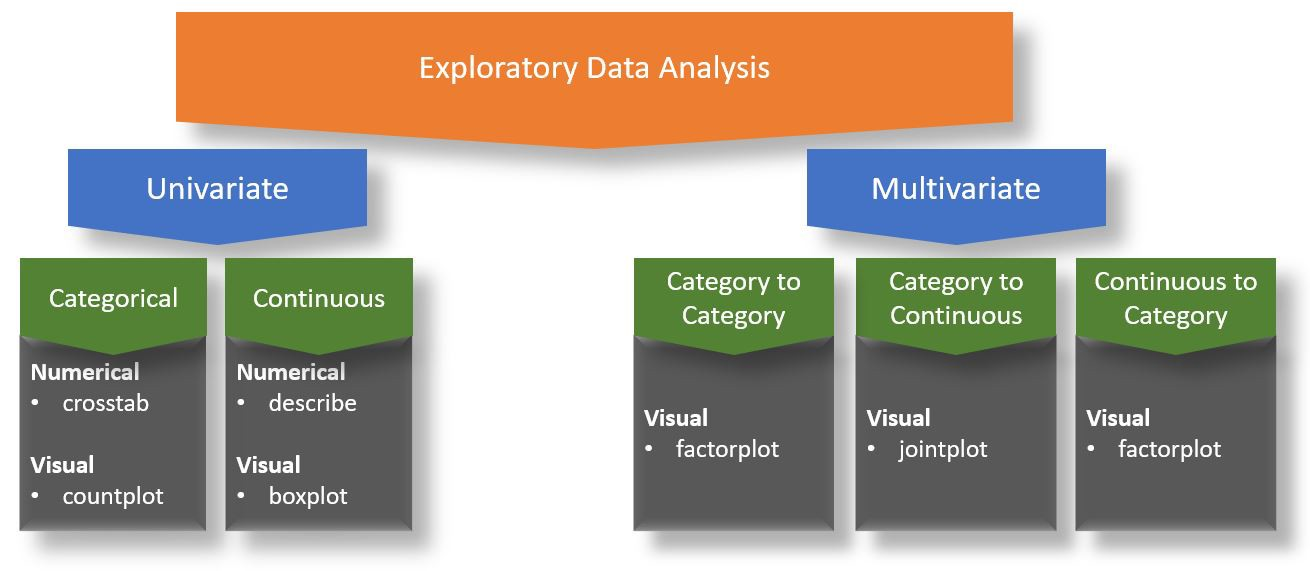

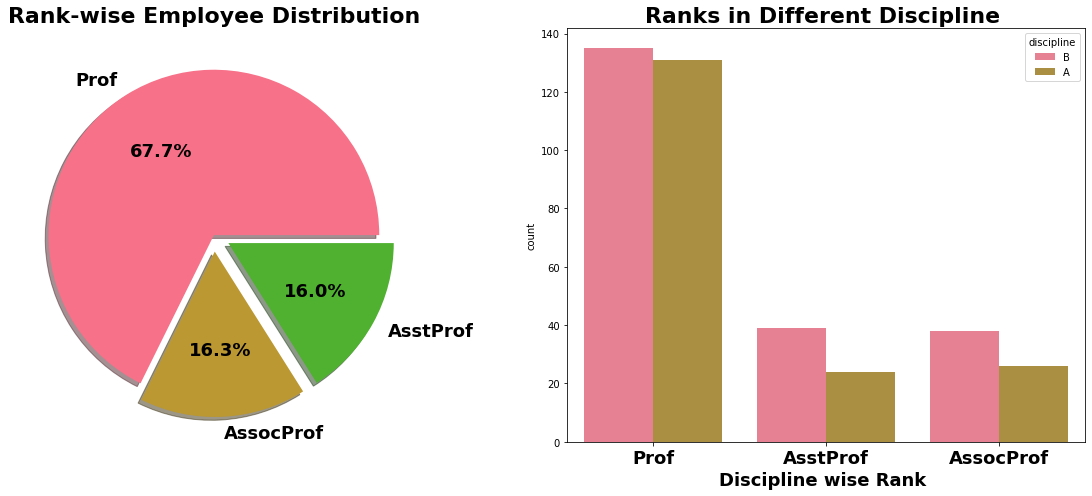

In [14]:
# Exploration of Feature rank
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['rank'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Rank-wise Employee Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('rank',hue='discipline', data=df,ax=ax[1])
ax[1].set_title('Ranks in Different Discipline ',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Discipline wise Rank ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- **Around 67.7 % Employees works as Professor followed by 16.3% as Associate Professor.**
- **We can see more Employees work in Discipline B than Discipline A.**

***We know that as Rank changes Salary changes so let us explore salary distribution rank wise.***

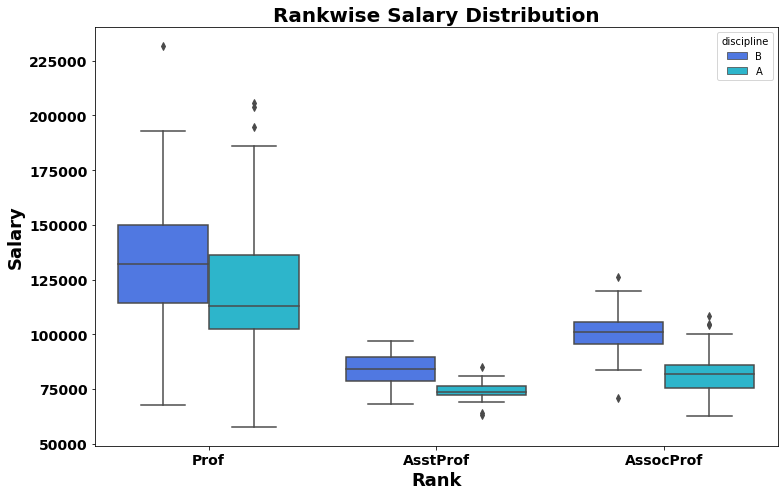

In [15]:
plt.figure(figsize=(11,7))
sns.set_palette('rainbow')
sns.boxplot(x="rank",y='salary', hue= 'discipline', data=df)
plt.title('Rankwise Salary Distribution',fontsize=20,fontweight ='bold')
plt.xlabel('Rank',fontsize=18,fontweight ='bold')
plt.ylabel('Salary',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation :
***Here we get some interesting observations:***
 - **Irrespective of Ranks the salary for <u>Discipline B</u> is greater than Discipline A.**
 - **Maximum Salary for rank of *`Assistant Professor is less than 25 % of Professor rank`* irrespective of Discipline.**
- Out of all employees **Maximum Salary (in whole dataset) comes from Professor rank with discipline B** while **Minimum Salary (in whole dataset) comes form Professor rank with discipline B**.
- **Irrepective of Rank median of salary for discipline B is much much greater than discipline A.**

***Experience & educational qualification plays major role in salary , so this might be reason of difference between such wide range of salary for professor rank. Let explore impact of years of service on salary & rank.***

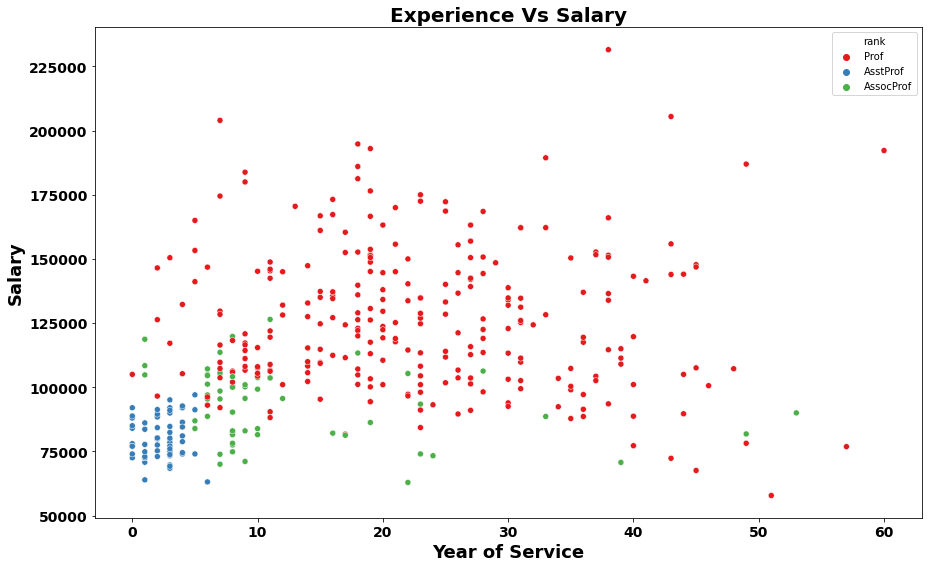

In [16]:
plt.figure(figsize=(13,8))
sns.set_palette('Set1')
sns.scatterplot(x="yrs.service",y='salary', hue= 'rank', data=df)
plt.title('Experience Vs Salary',fontsize=20,fontweight ='bold')
plt.xlabel('Year of Service',fontsize=18,fontweight ='bold')
plt.ylabel('Salary',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation :
- **As No of years of services increases then `More chance of having Professor Rank` and eventually having more salary.**
- **All assistant professor have year of exprience less than 7-8 years.**
- **Majority of Associate professor have year of exprience less than 12-13 years (with few exception).**
- **We do not find any particular trend or relation between salary for Professor rank and years of service.**

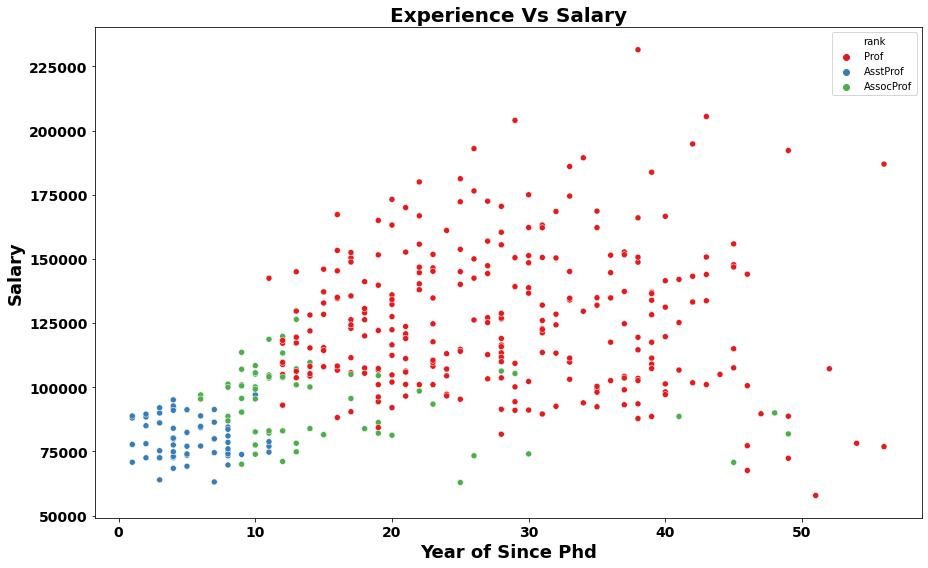

In [17]:
plt.figure(figsize=(13,8))
sns.set_palette('Set1')
sns.scatterplot(x="yrs.since.phd",y='salary', hue= 'rank', data=df)
plt.title('Experience Vs Salary',fontsize=20,fontweight ='bold')
plt.xlabel('Year of Since Phd',fontsize=18,fontweight ='bold')
plt.ylabel('Salary',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Around all assitant professor have less than 10 years since Phd.**
- **Around all associate professor have less than 20 years since Phd.**
- **There is linear relation between Years since Phd & Salary for Rank of Professor.**

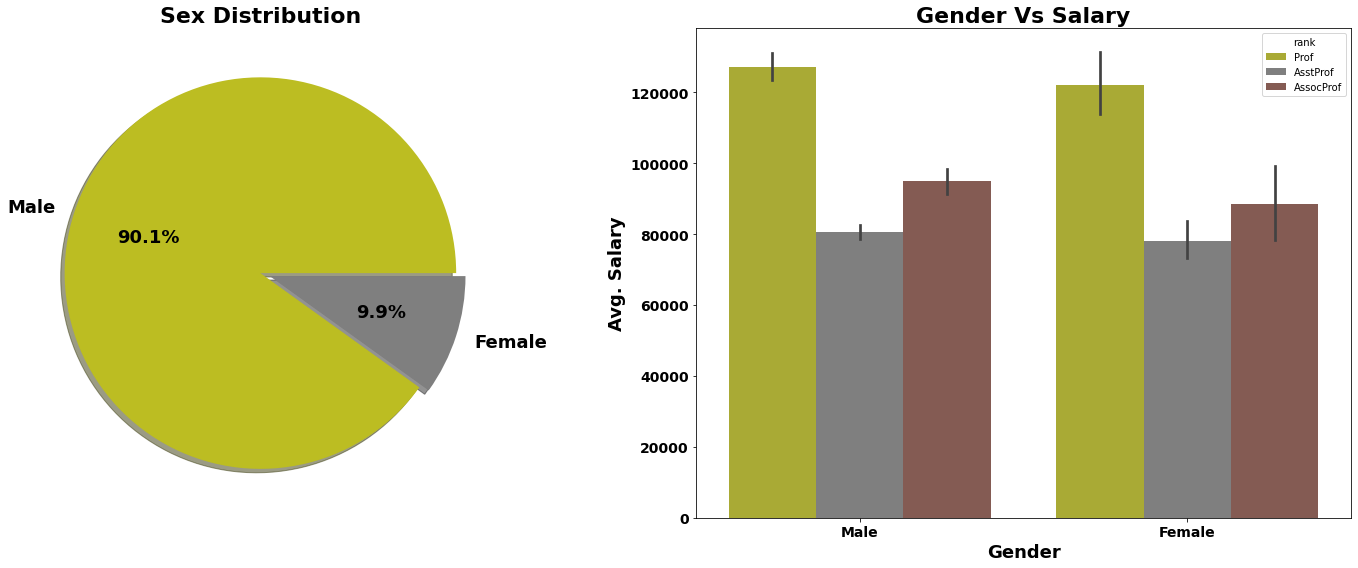

In [18]:
# Exploration of Feature rank
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10_r')
f,ax=plt.subplots(1,2,figsize=(20,8))
df['sex'].value_counts().plot.pie(explode=[0,0.05],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Sex Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.barplot(x="sex",y='salary', hue= 'rank', data=df,ax=ax[1])
ax[1].set_title('Gender Vs Salary',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Avg. Salary",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

In [19]:
pd.crosstab([df.sex,df.discipline],df["rank"],margins=True).style.background_gradient(cmap='summer_r')

#### Observation:
- **In this dataset around 90% employees are Male and remaining employees are female.**
- **Irrespective of Rank there is no much difference between average salaries of both gender.**

In [20]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Feature Enginnering

## **1.Encoding Categorical Data**

In [21]:
# Using Label Encode for categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


## **2. Outliers Detection and Removal**

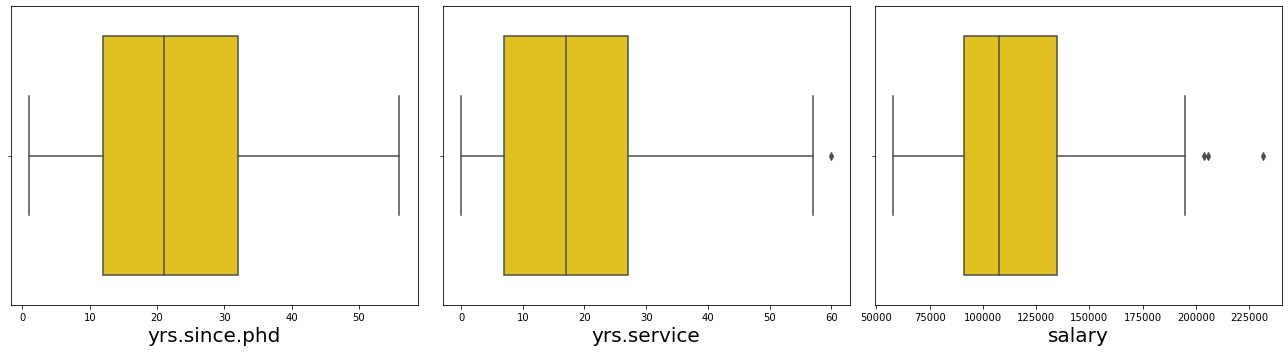

In [22]:
plt.figure(figsize=(18,5),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### **2.1. Outliers detection & removal using Zscore method**

In [23]:
df1=df.copy()

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (393, 6)
Shape of the dataframe after removing outliers:  (350, 6)
Percentage of data loss post outlier removal:  10.941475826972011


**We can Zscore method leading to data loss more than 10%.** 

- **Huge amount of data loss in Z-score , which is not acceptable**

- **Also the use of IQR method will naturally result in much higher data loss compare to Z-score**

**AS outliers are present in upper bound,We need to employ some other outliers removal techinque here.**

### **2.2. Outliers detection & removal using Quantile-based Flooring and Capping technique**

### Comment :
- **There outliers exist in data.**
- **There are no outliers in lower capping level but exist in upper bound.**
- **So we will use Quantile-based Flooring and Capping technique.**

### **We will Employ Quantile-based Flooring and Capping technique for outliers removal. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.**

In [25]:
df.shape

(393, 6)

#### **In this dataset, we will set the flooring at 0th percentile for lower bound and capping at 99th percentile for upper bound.**

**Upper bound set as 60th percentile as most of values in dataset are realistic but still there are few very extreme values**
**No Outliers in lower bound so Lower bound is set as 0th percentile.**

In [26]:
df1=df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.6)
IQR = Q3 - Q1
print(IQR)

rank                 2.0
discipline           1.0
yrs.since.phd       25.0
yrs.service         19.2
sex                  1.0
salary           58844.4
dtype: float64


In [27]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(383, 6)


In [28]:
print('Percentage Data Loss :', ((393-383)/393)*100)

Percentage Data Loss : 2.5445292620865136


## **3. Skewness of features**

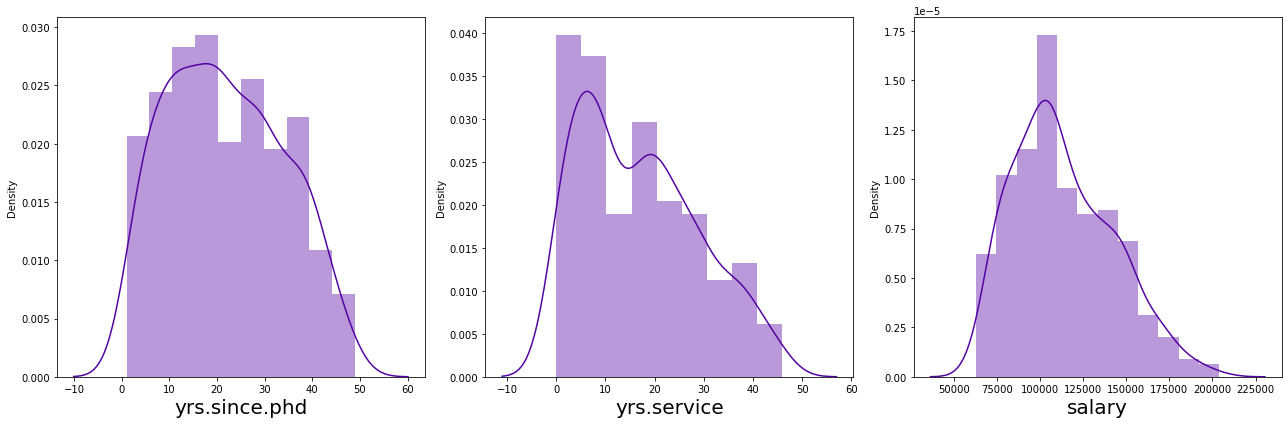

In [29]:
plt.figure(figsize=(18,6),facecolor='white')
plotnumber=1
sns.set_palette('plasma')
for column in Numerical:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

***We know skewness is only applicable for Numerical continous data so let check skewness of these features.***

In [30]:
# Skewness in Numerical Data
data[Numerical].skew()

yrs.since.phd    0.207029
yrs.service      0.490698
salary           0.553534
dtype: float64

- **We can see skewness for Numerical Variable within permissible limit.For Feature salary it is on slightly greater than limit but acceptable.**

## **4. Corrleation**

In [31]:
data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.079197,0.557472,0.485754,0.136315,0.537160
discipline,-0.079197,1.000000,-0.204740,-0.153741,0.003122,0.148815
yrs.since.phd,0.557472,-0.204740,1.000000,0.897912,0.146409,0.449181
yrs.service,0.485754,-0.153741,0.897912,1.000000,0.150019,0.353369
sex,0.136315,0.003122,0.146409,0.150019,1.000000,0.145441
salary,0.537160,0.148815,0.449181,0.353369,0.145441,1.000000


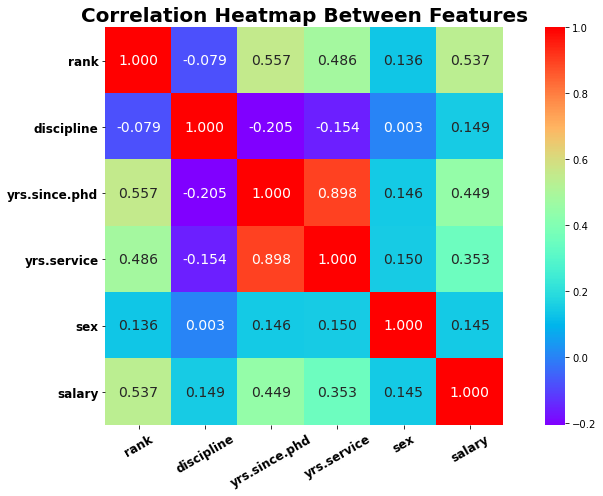

In [32]:
plt.figure(figsize= (12,7))
sns.heatmap(data.corr(), annot= True,fmt='0.3f',square= True, annot_kws={'size':14}, cmap= 'rainbow')
plt.title('Correlation Heatmap Between Features',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold', rotation=30)
plt.yticks(fontsize=12,fontweight ='bold', rotation=0)
plt.show()

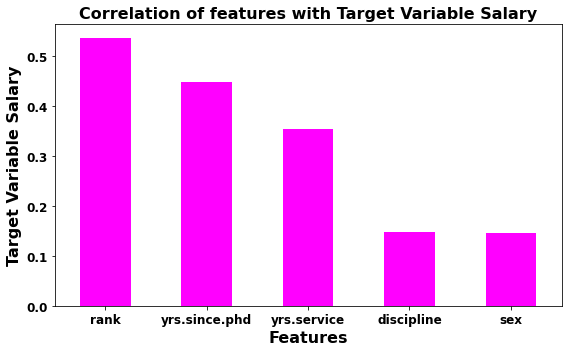

In [33]:
plt.figure(figsize= (8,5))
data.corr()['salary'].drop(['salary']).sort_values(ascending= False).plot(kind='bar',cmap='spring')
plt.xlabel('Features', fontsize = 16, fontweight='bold')
plt.ylabel('Target Variable Salary', fontsize = 16, fontweight='bold')
plt.title('Correlation of features with Target Variable Salary',fontsize = 16,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold', rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation :
- **We can see that feature rank is correlated with Target variable salary with correlation coeffient of 0.537 which is among all features.**
- **In heatmap we can see that 'yrs.since.phd' & 'yrs.service' are correlated with correlation coeffient of 0.898. This might suggest that multicollinerity exist between these features. But we cannot rush to conclusion too fast as 'Correlation doesnot mean causation.**
- **sex and discipline are very poorly correlated with remaining features in dataset.**

## **5.Spliting Data into X and Y**

In [34]:
# Splitting data in target and dependent feature
X = data.drop(['salary'], axis = 1)
Y = data['salary']

## **6. Checking Multicollinearity between features using variance_inflation_factor**

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,6.867913,rank
1,2.002436,discipline
2,23.237654,yrs.since.phd
3,15.101817,yrs.service
4,5.393981,sex


#### Observation:
- **We can see that Variance inflation factor for 'yrs.since.phd' & 'yrs.service' are greater than permissble limit.**
- **We can see 'yrs.since.phd' & 'yrs.service' are correlated with each other. Multicollinerity exist between them so we can drop one of column between them.**

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,6.867913,rank
1,2.002436,discipline
2,23.237654,yrs.since.phd
3,15.101817,yrs.service
4,5.393981,sex


- **Now Variance inflation factor within limit.**

## **5. Standard Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [39]:
!pip install xgboost

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=0.15)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (325, 5)
Training Target Vector Size : (325,)
Test Feature Matrix Size: (58, 5)
Test Target Vector Size: (58,)


### **Finding best Random state**

In [42]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.15)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5506485040804132 on Random_state 316


### **Linear Regression**

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 15772.964540192788
Mean squared error : 389545810.48482496
Root Mean squared error : 19736.914918112834
 R2 Score :
54.695321559844345


In [44]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.31628048463639374
Difference in R2 & CV Score: 23.06727309620497


### **Random Forest Regressor**

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 13275.073215859335
Mean squared error : 325289277.0126999
Root Mean squared error : 18035.77769359281
R2 Score of Random Forest Regressor :
62.16843899116922


In [46]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.2814716562456828
Difference in R2 & CV Score: 34.02127336660094


### **Decision Tree Regressor**

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 17395.525862068964
Mean squared error : 559238168.6853448
Root Mean squared error : 23648.21702973281
R2 Score of Decision Tree Regressor :
34.959882196607374


In [48]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.10641927708279235
Difference in R2 & CV Score: 45.60180990488661


### **Extra Trees Regressor**

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 14366.861379310345
Mean squared error : 365795589.5371819
Root Mean squared error : 19125.783370549347
R2 Score of Extra Tree Regressor :
57.45750278206425


In [50]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.1347129990458677
Difference in R2 & CV Score: 43.98620287747748


### **XGB Regressor**

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 16064.73599137931
Mean squared error : 454376419.17297786
Root Mean squared error : 21316.107036064954
R2 Score of XGB Regressor :
47.155438443040175


In [52]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.06840047488717882
Difference in R2 & CV Score: 40.3153909543223


### **AdaBoost Regressor**

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
y_pred = adb.predict(X_test)
print('\033[1m'+ 'Error of AdaBoost Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of AdaBoost Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of AdaBoost Regressor:
Mean absolute error : 12874.638540262451
Mean squared error : 307360446.2402942
Root Mean squared error : 17531.698327323975
R2 Score of AdaBoost Regressor :
64.25358505381298


In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(adb, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',adb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.4513508320686087
Difference in R2 & CV Score: 19.118501846952114


### **Gradient Boosting Regressor**

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
y_pred = adb.predict(X_test)
print('\033[1m'+ 'Error of Gradient Boosting Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Gradient Boosting Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Gradient Boosting Regressor:
Mean absolute error : 12874.638540262451
Mean squared error : 307360446.2402942
Root Mean squared error : 17531.698327323975
R2 Score of Gradient Boosting Regressor :
64.25358505381298


In [56]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(gbr, X, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',gbr,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.3184488596396816
Difference in R2 & CV Score: 32.40869908984482


# Hyper Parameter Tuning : GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
print(adb.get_params())

{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 271, test_size=0.15)

In [60]:
parameter = {
 'learning_rate': [ 0.01, 0.1,0.2,0.5,0.75,1],
 'n_estimators': [50, 100, 150,200,500],
 'loss': ["linear", "square", "exponential"]}

In [61]:
GCV = GridSearchCV(AdaBoostRegressor(),parameter,verbose =10)

In [62]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START learning_rate=0.01, loss=linear, n_estimators=50...........
[CV 1/5; 1/90] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.350 total time=   0.0s
[CV 2/5; 1/90] START learning_rate=0.01, loss=linear, n_estimators=50...........
[CV 2/5; 1/90] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.577 total time=   0.0s
[CV 3/5; 1/90] START learning_rate=0.01, loss=linear, n_estimators=50...........
[CV 3/5; 1/90] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.406 total time=   0.0s
[CV 4/5; 1/90] START learning_rate=0.01, loss=linear, n_estimators=50...........
[CV 4/5; 1/90] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.383 total time=   0.0s
[CV 5/5; 1/90] START learning_rate=0.01, loss=linear, n_estimators=50...........
[CV 5/5; 1/90] END learning_rate=0.01, loss=linear, n_estimators=50;, score=0.465 total time=   0.0s
[CV 1/5; 2/90] START learnin

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.75, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200, 500]},
             verbose=10)

In [63]:
GCV.best_params_

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 100}

## **Final Model**

In [64]:
Final_mod=AdaBoostRegressor(learning_rate = 1, loss='linear', n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 60.61470382732455
mean_squared_error: 338648847.02881074
mean_absolute_error: 12966.264335002783
RMSE value: 18402.41416306053


## Saving Final Model

In [65]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Salary_Prediction_Project.pkl")

['Salary_Prediction_Project.pkl']